In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PÁISES

In [126]:
paises = pd.read_csv('EGOV_DATA_2024.csv')['Country Name'].sort_values(ascending=True).tolist()

TIC

In [127]:
tic = pd.read_excel('ict_in_government.xlsx')

In [128]:
tic = tic[tic['Year'] == 2024]

In [129]:
tic['Soma das Respostas Positivas'] = tic['Indicator_1'] +tic['Indicator_2'] + tic['Indicator_3'] 

In [130]:
tic = tic[tic['Country'].isin(paises)]

In [131]:
tic['Country'] = tic['Country'].sort_values(ascending=True)

In [132]:
tic = tic.iloc[:, [0,1,5]].reset_index(drop=True)

PAÍSES

In [133]:
paises = tic['Country'].unique().tolist()

ÍNDICE DE DEMOCRACIA ELEITORAL

In [134]:
ide = pd.read_csv('updated_electoral_democracy_index.csv')

In [135]:
ide = ide[ide['Year'] == 2024]

In [136]:
ide = ide.iloc[:, [0, 3]]

In [137]:
ide = ide[ide['Entity'].isin(paises)].reset_index(drop=True)

In [138]:
paises = ide['Entity'].unique().tolist()

In [139]:
tic = tic[tic['Country'].isin(paises)]

DISPERSÃO

In [140]:
dispersao  = pd.DataFrame()
dispersao['Soma das Respostas Positivas'] = tic['Soma das Respostas Positivas']
dispersao['Electoral democracy index (central estimate)'] = ide['Electoral democracy index (central estimate)']

In [141]:
dispersao = dispersao.rename(columns={
    'Electoral democracy index (central estimate)': 'Índice de Democracia Eleitoral'
})

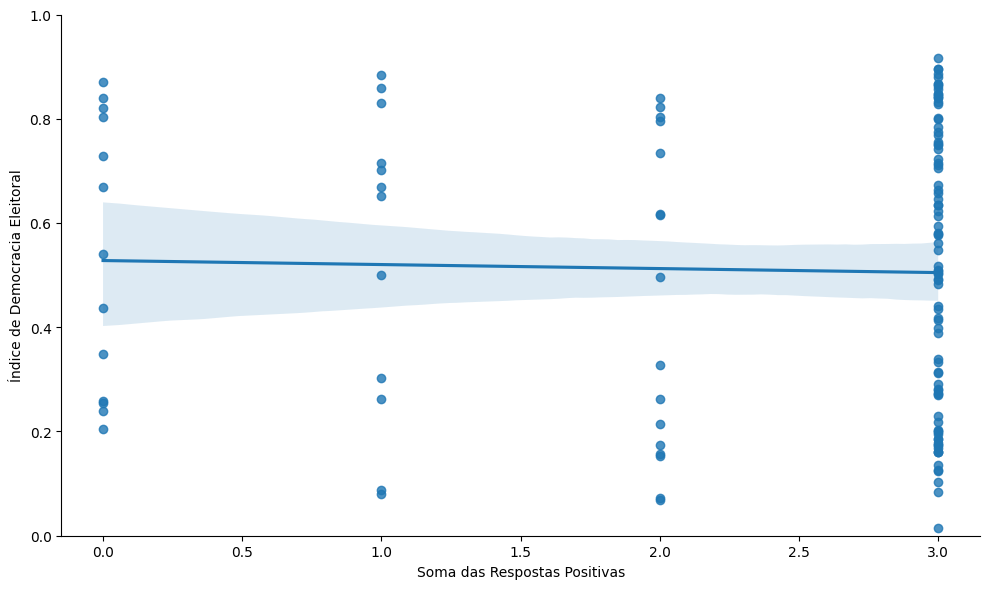

In [142]:
plt.figure(figsize=(10, 6))

sns.regplot(dispersao, x='Soma das Respostas Positivas', y='Índice de Democracia Eleitoral')

sns.despine()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()